In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df=df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [7]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

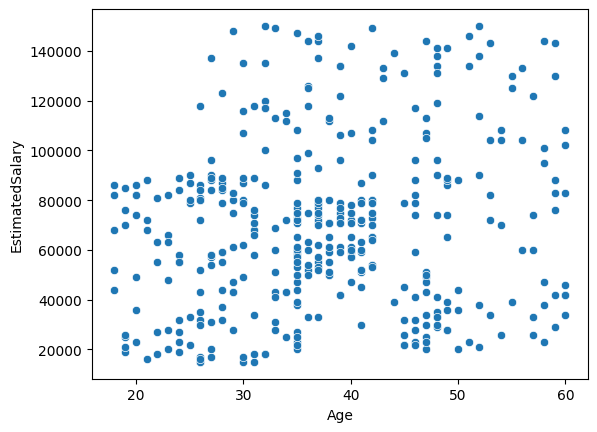

In [9]:
sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1])


In [10]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100


10/10 [==============================] - 1s 26ms/step - loss: 6289.9424 - accuracy: 0.3469 - val_loss: 2933.6870 - val_accuracy: 0.4000
Epoch 2/100
10/10 [==============================] - 0s 6ms/step - loss: 1318.3784 - accuracy: 0.4469 - val_loss: 1242.4811 - val_accuracy: 0.6000
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 1007.1469 - accuracy: 0.6531 - val_loss: 298.6586 - val_accuracy: 0.6000
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 417.5316 - accuracy: 0.3781 - val_loss: 7.3499 - val_accuracy: 0.4000
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 365.5130 - accuracy: 0.6031 - val_loss: 107.2603 - val_accuracy: 0.6000
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 147.7858 - accuracy: 0.4531 - val_loss: 176.8583 - val_accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 107.5281 - accuracy: 0.5281 - val_loss: 205.7443 - 

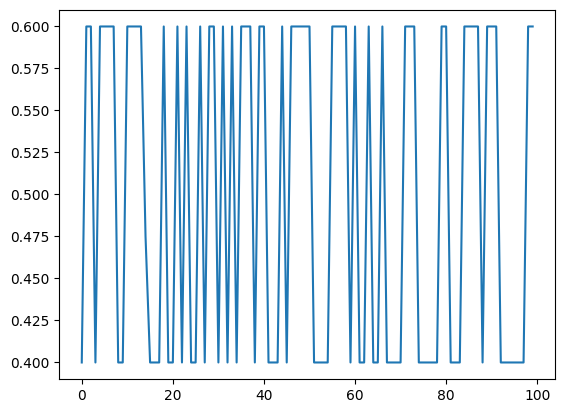

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])

## APPLY SCALING

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

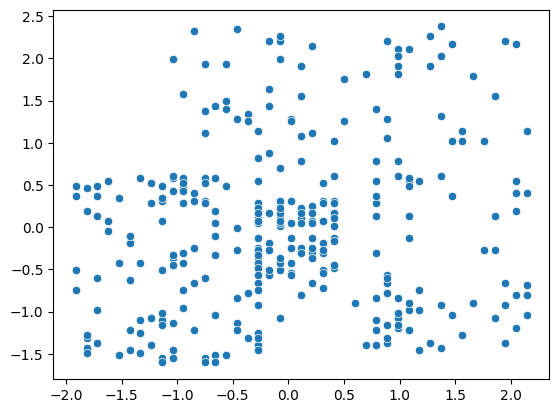

In [25]:
sns.scatterplot(x=X_train_scaled[:,0], y=X_train_scaled[:,1])


In [26]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 18ms/step - loss: 0.6247 - accuracy: 0.7125 - val_loss: 0.5936 - val_accuracy: 0.7125
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5784 - accuracy: 0.7375 - val_loss: 0.5477 - val_accuracy: 0.7250
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5368 - accuracy: 0.7781 - val_loss: 0.5096 - val_accuracy: 0.7375
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5023 - accuracy: 0.7906 - val_loss: 0.4760 - val_accuracy: 0.7625
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4717 - accuracy: 0.8094 - val_loss: 0.4449 - val_accuracy: 0.7750
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4446 - accuracy: 0.8156 - val_loss: 0.4181 - val_accuracy: 0.7875
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4181 - accuracy: 0.8313 - val_loss: 0.3969 - val_accuracy: 0.7875
Epoch 8/100


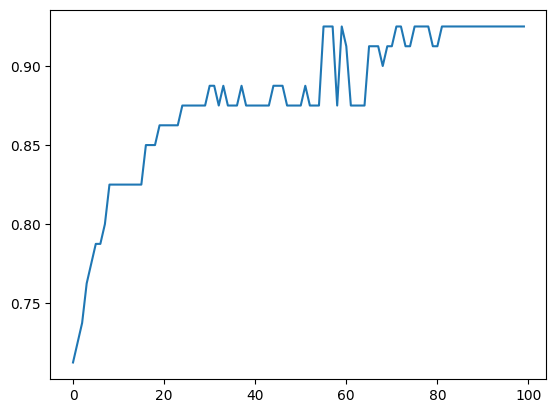

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'])